In [97]:
import pandas as pd
import numpy as np


In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [99]:
train=pd.read_csv('titanic_train.csv')

In [100]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [101]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

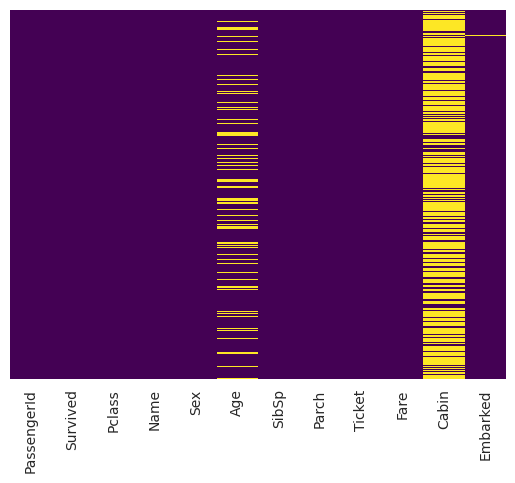

In [102]:


sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [103]:
sns.set_style('whitegrid')

<Axes: xlabel='Survived', ylabel='count'>

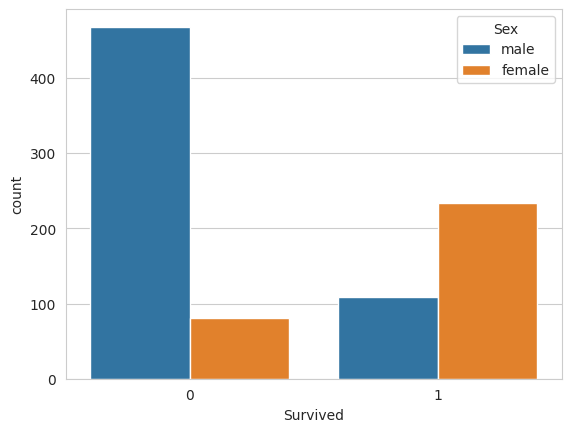

In [104]:
sns.countplot(x='Survived',hue='Sex', data=train)

<Axes: xlabel='Survived', ylabel='count'>

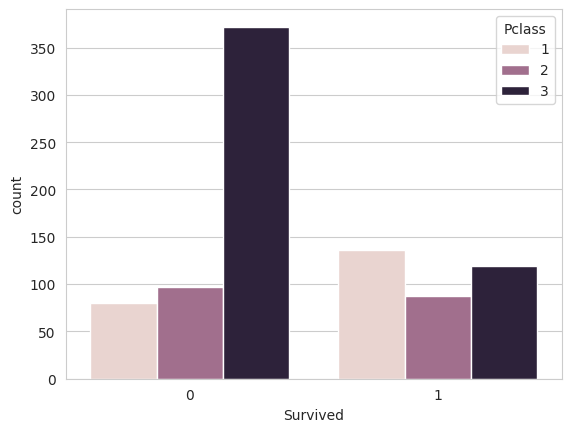

In [105]:
sns.countplot(x='Survived',hue='Pclass', data=train)

<Axes: xlabel='Age', ylabel='Count'>

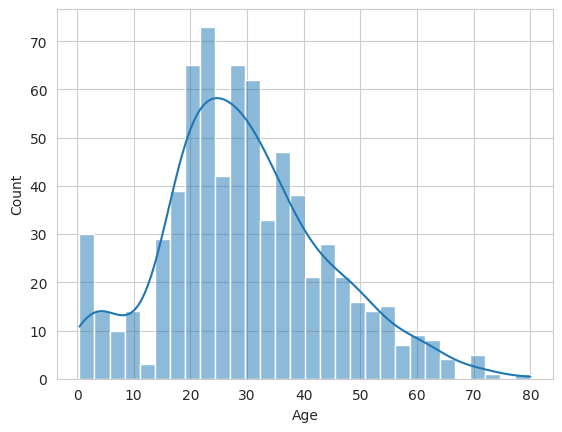

In [106]:
sns.histplot(train['Age'].dropna(), kde=True, bins=30)

<Axes: ylabel='Frequency'>

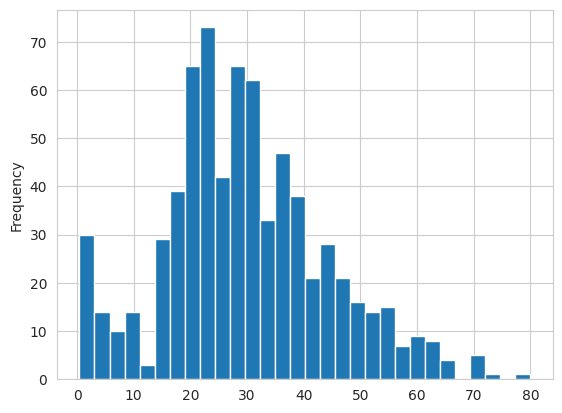

In [107]:
train['Age'].plot.hist(bins=30)

In [108]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<ipython-input-109-3e09d512590a>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='SibSp', ylabel='count'>

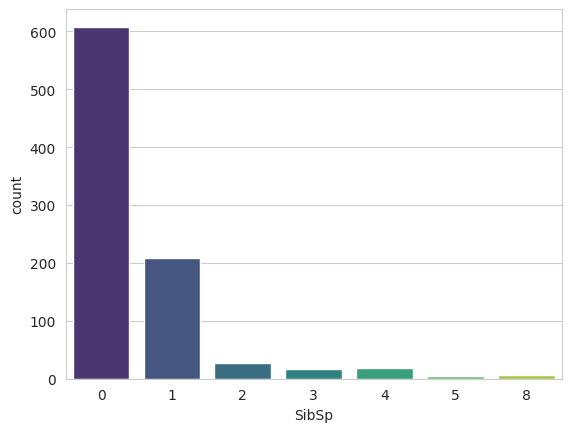

In [109]:
sns.countplot(x='SibSp',data=train,palette='viridis')

<Axes: >

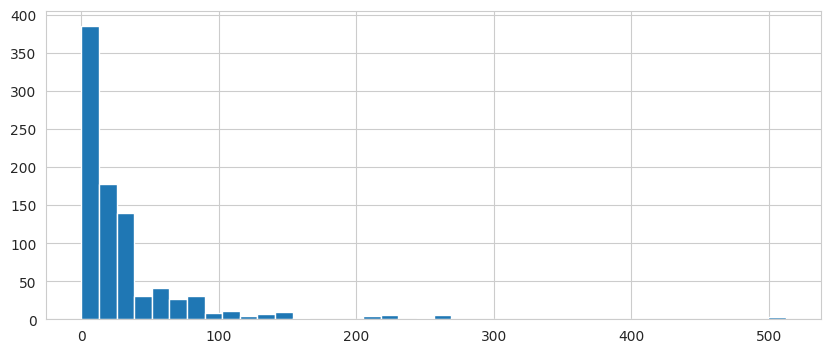

In [110]:
train['Fare'].hist(bins=40,figsize=(10,4))

In [111]:
import cufflinks as cf

In [112]:
cf.go_offline()

In [113]:
train['Fare'].iplot(kind='hist',bins=30)

<ipython-input-114-7b3249e53ac3>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='Pclass', ylabel='Age'>

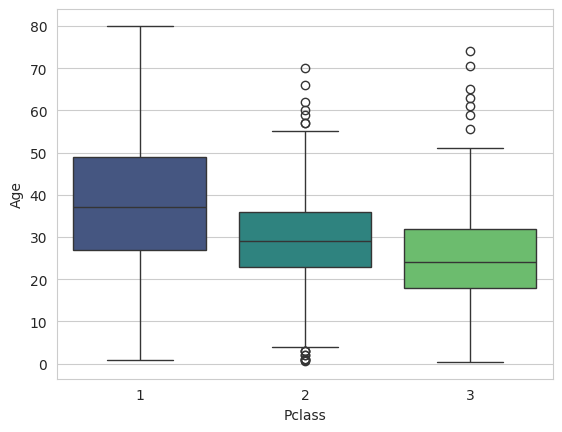

In [114]:
sns.boxplot(x='Pclass',y='Age',data=train,palette='viridis')

In [115]:
def impute_age(cols):
  Age=cols[0]
  Pclass=cols[1]

  if pd.isnull(Age):
    if Pclass ==1:
      return 37
    elif Pclass==2:
      return 29
    else:
      return 24
  else:
    return Age

In [116]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

<Axes: >

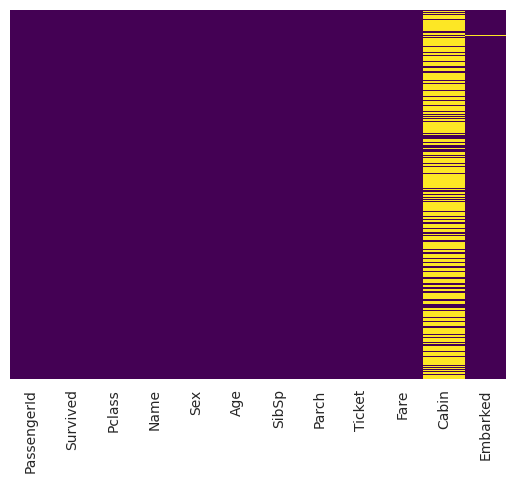

In [117]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [118]:
train.drop('Cabin',axis=1,inplace=True)

<Axes: >

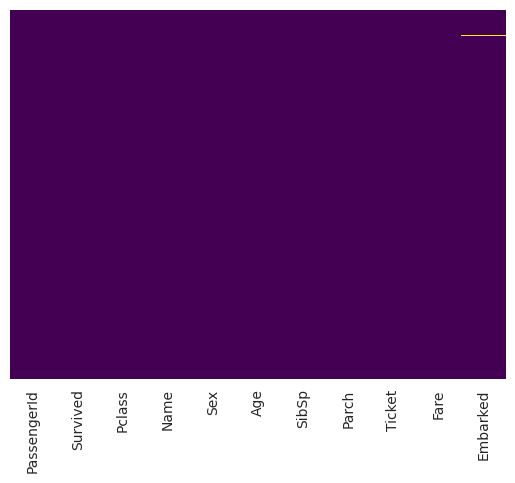

In [119]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [120]:
train.dropna(inplace=True)

In [121]:
sex=pd.get_dummies(train['Sex'],drop_first=True)

In [122]:
embarked=pd.get_dummies(train['Embarked'],drop_first=True)

In [123]:
embarked.head()

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [124]:
train=pd.concat([train,sex,embarked],axis=1)

In [125]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,True,False,True


In [126]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [127]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


In [128]:
train.drop(['PassengerId'],axis=1,inplace=True)

In [129]:
X=train.drop('Survived',axis=1)
Y=train['Survived']


In [130]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,True,False,True
1,1,38.0,1,0,71.2833,False,False,False
2,3,26.0,0,0,7.9250,False,False,True
3,1,35.0,1,0,53.1000,False,False,True
4,3,35.0,0,0,8.0500,True,False,True


In [141]:
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [131]:
from sklearn.model_selection import train_test_split

In [142]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.33,random_state=42)

In [143]:
from sklearn.linear_model import LogisticRegression

In [144]:
logmodel=LogisticRegression()

In [145]:
logmodel.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [146]:
predictions=logmodel.predict(X_test)

In [147]:
from sklearn.metrics import classification_report

In [148]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85       184
           1       0.75      0.76      0.76       110

    accuracy                           0.82       294
   macro avg       0.80      0.81      0.80       294
weighted avg       0.82      0.82      0.82       294



In [149]:
from sklearn.metrics import confusion_matrix

In [151]:
confusion_matrix(Y_test,predictions)

array([[156,  28],
       [ 26,  84]])